In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
from matplotlib import pyplot as plt
import numpy as np
import pygtc
import emcee
import corner
from emcee.autocorr import AutocorrError, integrated_time

## make the plots not suck
plt.rcParams['lines.linewidth']   =3
plt.rcParams['axes.linewidth']    = 2
plt.rcParams['xtick.major.width'] =2
plt.rcParams['ytick.major.width'] =2
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelweight']='semibold'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['axes.titleweight']='semibold'
plt.rcParams['axes.titlesize']=9



In [20]:
filename = 'Lowres_backend2.h5'#'Lowres_backend2.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 5

In [21]:
tau = reader.get_autocorr_time(tol=0)
print(tau)
converged = np.all(tau * 75 < reader.iteration)
print(converged)
print(reader.iteration, tau*50)

[1871.98925235 2189.07482194 1447.14974139  502.09130302  347.11837704
  330.83232372  346.0851841   337.52585078  293.14553991]
True
200000 [ 93599.46261772 109453.74109709  72357.48706963  25104.56515081
  17355.91885186  16541.61618612  17304.2592048   16876.29253886
  14657.27699536]


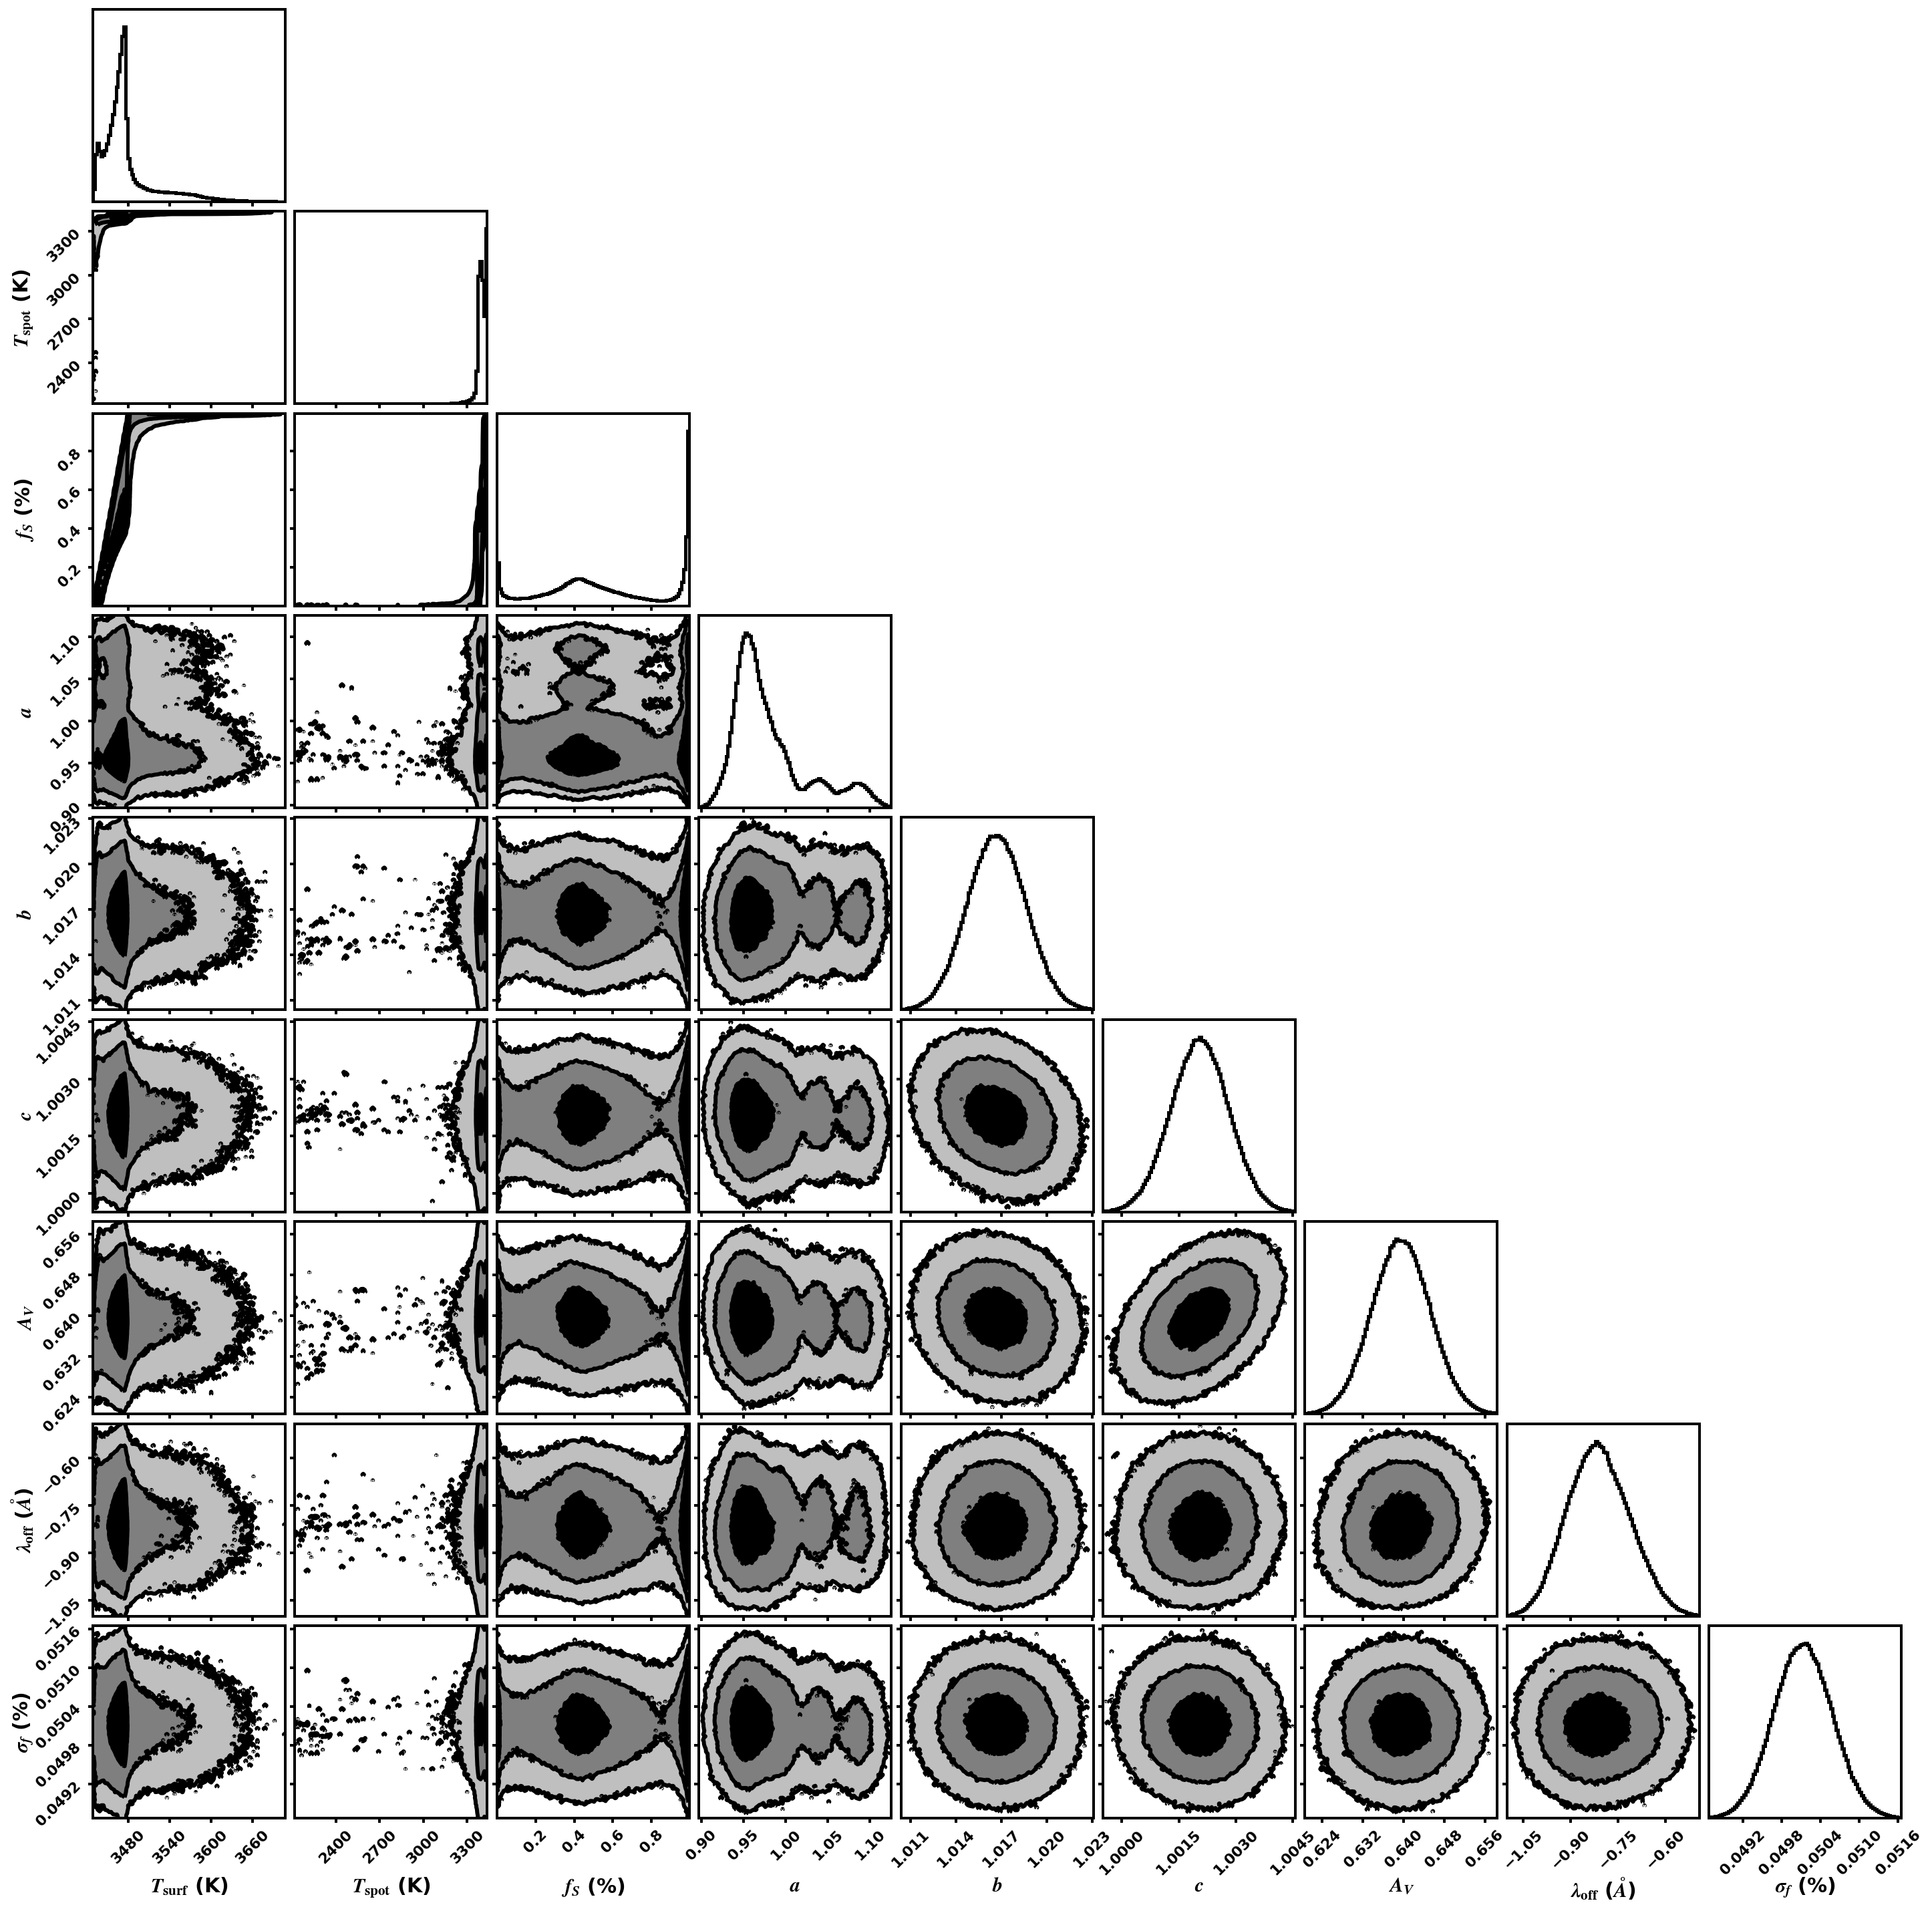

In [24]:
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
labels = [r'$T_{\rm{surf}}$ (K)',r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)',r'$a$',r'$b$',r'$c$','$A_V$',r'$\lambda_{\rm{off}}$ ($\AA$)',r'$\sigma_f$ (%)']
rng = [0.999] * samples.shape[1]

######
samples[:,0]+=75.
samples[:,1]+=75.
# print(np.shape(samples))
# fs = np.array(samples[:,2])
# old = np.array(samples[:,1])
# offset = np.array((0.003*np.array(samples[:,1])/(fs**0.4)))
# samples[:,1] = np.array(samples[:,1])-offset
# loc = np.squeeze(np.where(samples[:,1]<1500))
# samples[loc,1] = old[loc]
# new = np.array(samples[:,1])
####

#fig = corner.corner( 
#    samples, 
#    fill_contours=True, labels=labels,range=rng, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
#    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
#);
#plt.show()


fig = corner.corner( 
    samples, bins=100,
    fill_contours=True, range=rng,labels=labels, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.show()

In [38]:
samples_trim1 = np.array(samples[:,[0,1,2,6]])
samples_trim1[:,2]=100.*np.array(samples_trim1[:,2])
print(np.shape(samples_trim1))

(3800000, 4)


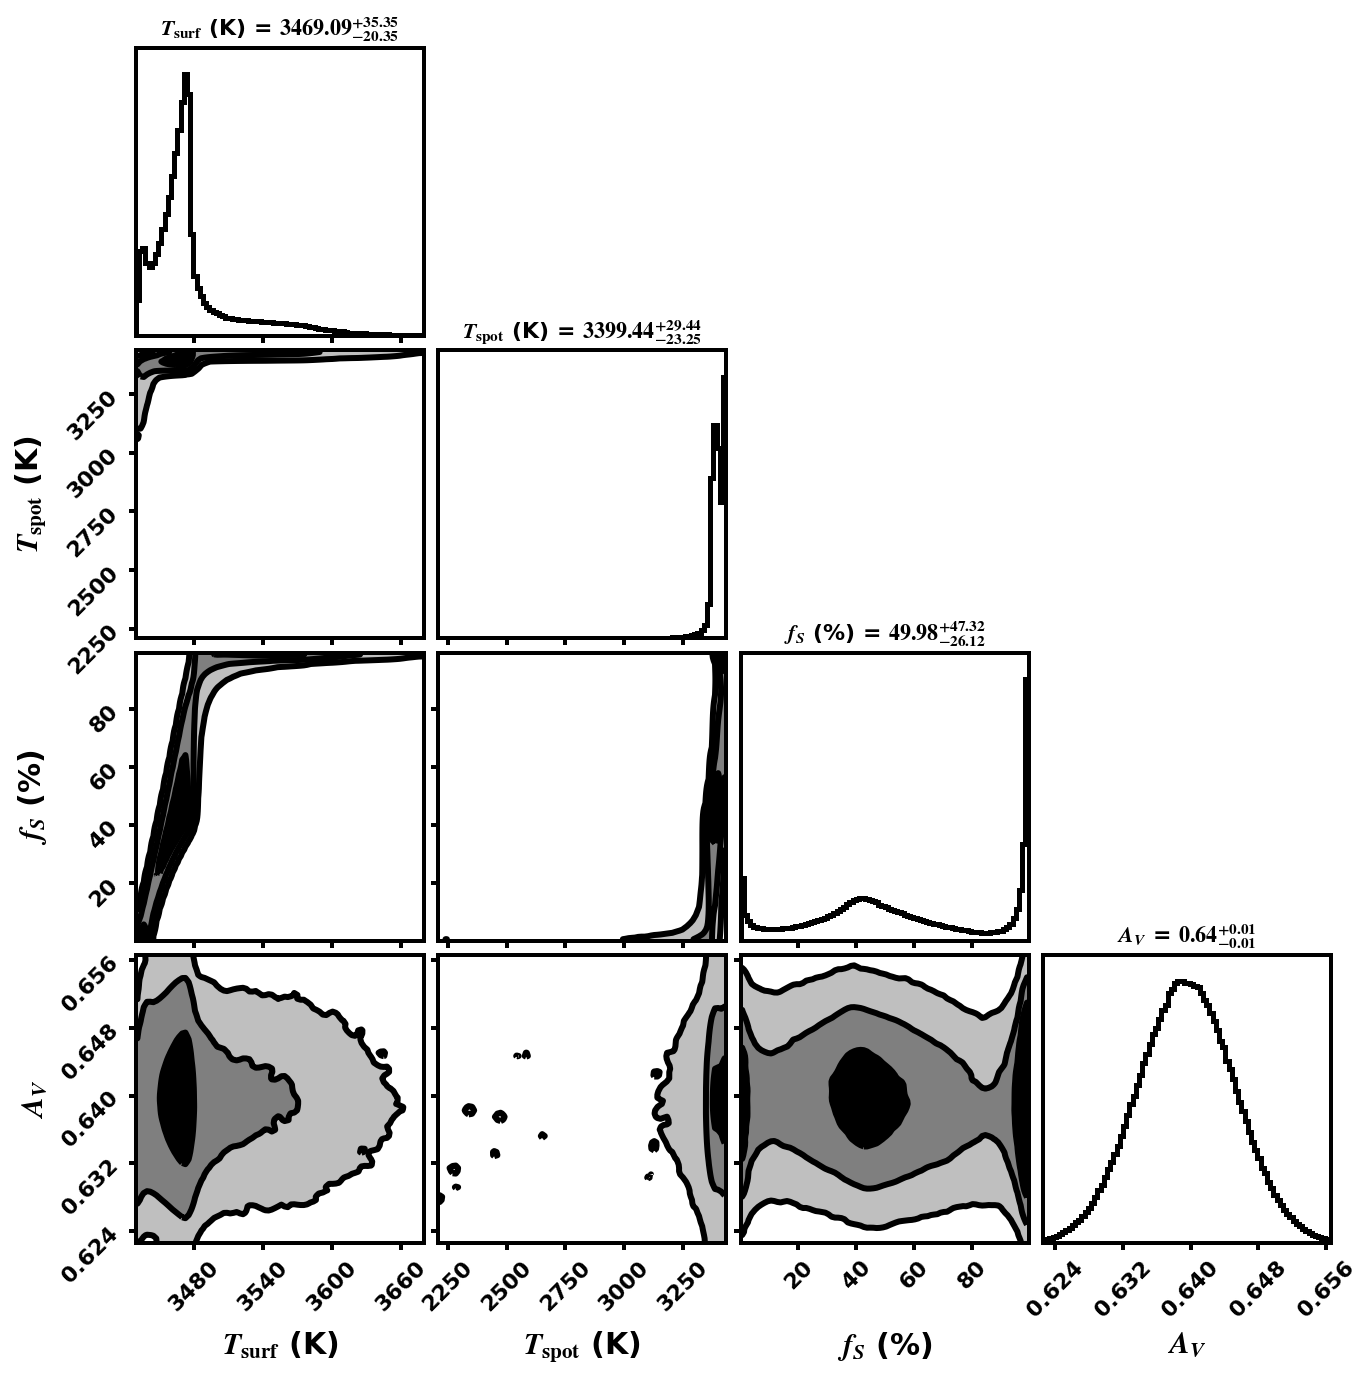

In [48]:
rng = [0.997] * samples_trim1.shape[1]
limits = [[3420,3600],[2800,3480],[0,99],[0.62,0.66]]
labels = [r'$T_{\rm{surf}}$ (K)',r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)',r'$A_V$']
fig = corner.corner( 
    samples_trim1, bins=90,smooth=1,
    fill_contours=True, show_titles=True,title_fmt='.2f', range=rng,labels=labels, plot_datapoints=False,title_kwargs={"fontsize": 11},
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);

plt.savefig('lowres_mini_contour1.pdf')

DO WE WANT TO MODEL OUT THE FLUX CAL ERRORS IN THE SPECTRA?!?

In [12]:
samples_trim1 = samples[:,1:3]
samples_trim1[:,1]=100*np.array(samples_trim1[:,1])
rng = [0.999] * samples_trim1.shape[1]

labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
fig = corner.corner( 
    samples_trim1, 
    fill_contours=True, range=rng,show_titles=True, title_fmt='.0f',labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.savefig('lowres_mini_contour2.pdf')

ValueError: Dimension mismatch between samples and range

(960000, 3)


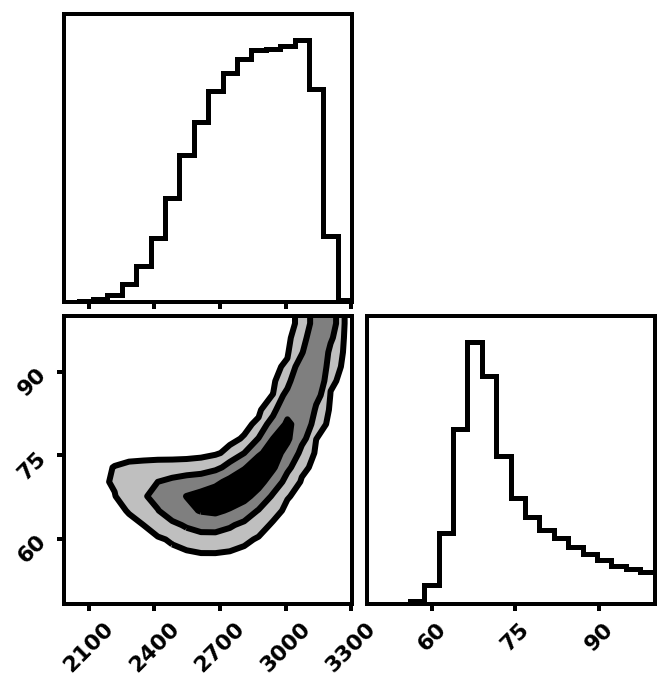

In [12]:
filename = 'Transspec2.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 2
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
samples[:,0]=100*np.array(samples[:,0])
print(np.shape(samples))
samples_trim2 = samples[:,0:2]
tmp1 = np.array(samples_trim2[:,0])
tmp2 = np.array(samples_trim2[:,1])
samples_trim2[:,0] = np.array(tmp2)
samples_trim2[:,1] = np.array(tmp1)

fig = corner.corner( 
    samples_trim2, 
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);


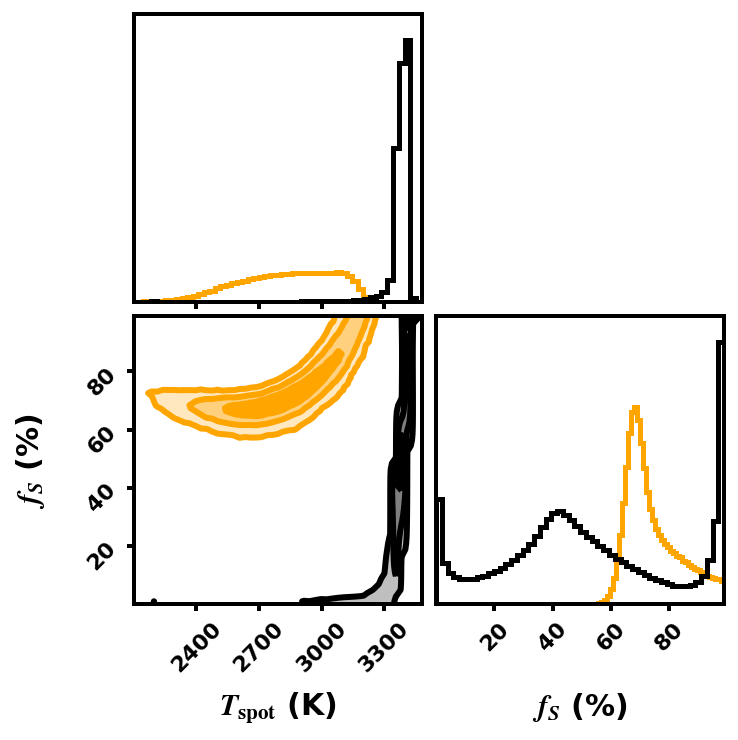

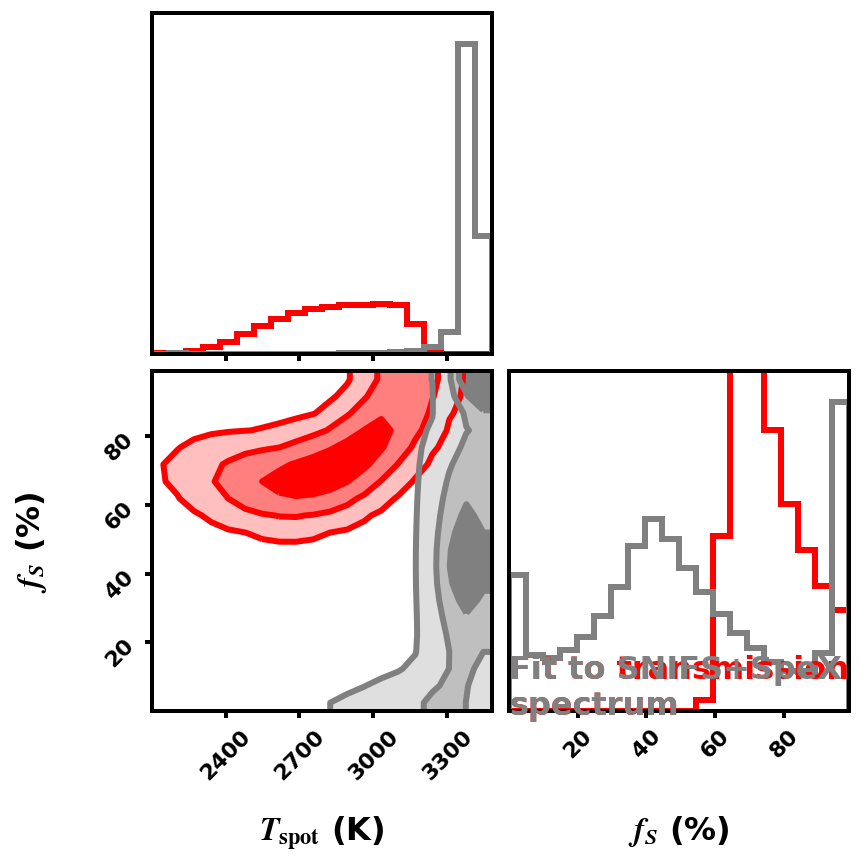

In [15]:
labels = [r'$T_{\rm{spot}} (K)',r'$f_S$ (%)']
limits = [[2100,3480],[0,99]]
weights = np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1)
levels = [(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
#print(levels)

fig = corner.corner(samples_trim2,fill_contours=True, plot_datapoints=False,
                    color='orange',hist_kwargs={"linewidth": 2.5},bins=50,
                    levels=levels,title_kwargs={"fontsize": 11},
                        )
labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
corner.corner( 
    samples_trim1, fig=fig,range=limits,bins=50,
    fill_contours=True, labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},weights=weights,levels=levels
);

plt.show()


fig1 = corner.corner(samples_trim2,labels=labels, hist_kwargs={"linewidth": 3},
                    range=limits, color='red', plot_datapoints=False, 
                    fill_contours=True, smooth=1.0, levels=levels, 
                    label_kwargs={"fontsize": 16});
fig2 = corner.corner(samples_trim1, weights=weights, fig=fig1, 
              labels=labels, range=limits, color='grey',hist_kwargs={"linewidth": 3},
              plot_datapoints=False, fill_contours=True, 
              levels=levels, smooth=1.0, label_kwargs={"fontsize": 16});

args = {"fontsize": 16}
plt.text(0,1e4,'Fit to transmission\nspectrum',horizontalalignment='left',
         verticalalignment='center',color='red',
         **args)
plt.text(0,1e4,'Fit to SNIFS+SpeX\nspectrum',horizontalalignment='left',
         verticalalignment='center',color='grey',
         **args)
fig2.set_size_inches(6.5, 6.5)

plt.savefig('dual_constraint1.pdf')

#corner.corner(samples_trim1, fig=fig, weights=np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1),fill_contours=True, plot_datapoints=False)

(3800000, 2) (960000, 2)
['$T_{\\rm{spot}}$ (K)', '$f_S$ (%)']


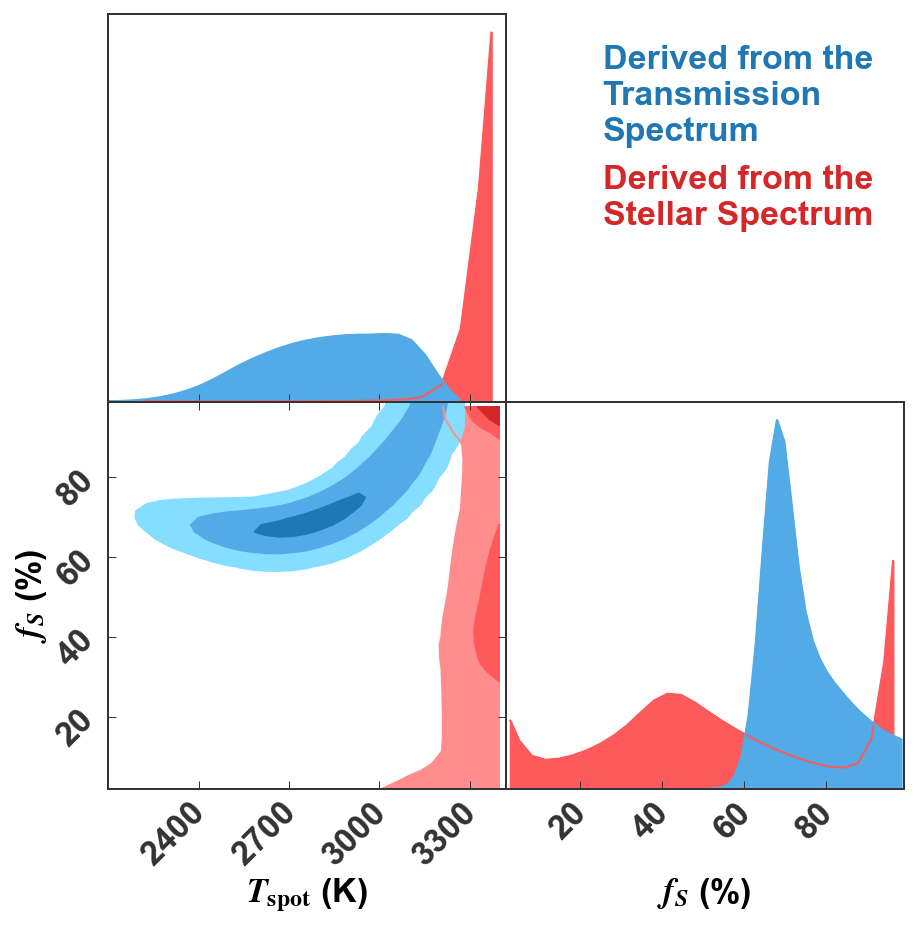

In [14]:
print(np.shape(samples_trim1),np.shape(samples_trim2))
print(labels)

labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
GTC = pygtc.plotGTC(chains=[samples_trim2,samples_trim1],holdRC=True,
                    sigmaContourLevels=True,
                    nContourLevels=3,
                    colorsOrder=['blues', 'reds', 'purples', 'browns', 'pinks'],
                    figureSize='APJ_page',
                    chainLabels=['Derived from the\nTransmission\nSpectrum','Derived from the\nStellar Spectrum'],
                    mathTextFontSet=None,
                    paramRanges=[[2100,3420],[2,99]],
                    paramNames=labels,
                    customLabelFont={"size":17},
                    customLegendFont={"size":17},
                    customTickFont={"size":17}
                    #,contour_kwargs={"fontsize": 16}
                   )


In [ ]:
filename = 'IGRINS_backend_K_11.h5'#'Lowres_backend2.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 5
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)

fig = corner.corner( 
    samples, 
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.show()

samples_trim1 = samples[:,1:3]
samples_trim1[:,1]*=100
rng = [0.999] * samples_trim1.shape[1]

labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
fig = corner.corner( 
    samples_trim1, 
    fill_contours=True, range=rng,show_titles=True, title_fmt='.0f',labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.savefig('hires_mini_contour2.pdf')


In [ ]:
labels = [r'$T_{\rm{spot}} (K)',r'$f_S$ (%)']
limits = [[2100,3780],[0,99]]
weights = np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1)
levels = [(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
#print(levels)

fig = corner.corner(samples_trim2,fill_contours=True, plot_datapoints=False,
                    color='orange',hist_kwargs={"linewidth": 2.5},bins=50,
                    levels=levels,title_kwargs={"fontsize": 11},
                        )
labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
corner.corner( 
    samples_trim1, fig=fig,range=limits,bins=50,
    fill_contours=True, labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},weights=weights,levels=levels
);

plt.show()


fig1 = corner.corner(samples_trim2,labels=labels, hist_kwargs={"linewidth": 3},
                    range=limits, color='red', plot_datapoints=False, 
                    fill_contours=True, bins=100, smooth=1.0, levels=levels, 
                    label_kwargs={"fontsize": 16});
fig2 = corner.corner(samples_trim1, weights=weights, fig=fig1, 
              labels=labels, range=limits, color='grey',hist_kwargs={"linewidth": 3},
              plot_datapoints=False, fill_contours=True, bins=100, 
              levels=levels, smooth=1.0, label_kwargs={"fontsize": 16});

args = {"fontsize": 16}
plt.text(0,1.7e5,'Fit to transmission\nspectrum',horizontalalignment='left',
         verticalalignment='center',color='red',
         **args)
plt.text(0,1.5e5,'Fit to IGRINS\nspectrum',horizontalalignment='left',
         verticalalignment='center',color='grey',
         **args)
fig2.set_size_inches(6.5, 6.5)

plt.savefig('dual_constraint2.pdf')

#corner.corner(samples_trim1, fig=fig, weights=np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1),fill_contours=True, plot_datapoints=False)

